# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhammad Rifqi Rahmanda
- **Email:** rifqirahmanda2004@gmail.com / 22081010315@student.upnjatim.ac.id
- **ID Dicoding:** Muhammad Rifqi Rahmanda

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda tahunan, yang diukur dalam hari dan jam?
- Faktor cuaca apa yang memiliki pengaruh terbesar terhadap jumlah perusahaan rental sepeda?


## Import Semua Packages/Library yang Digunakan

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

Pada bagian gathering data , saya memuat dataset Bike Sharing yang diberikan 2 dataset yaitu data hari dan data jam. Data tersebut ditampilkan dalam beberapa baris untuk mengetahui bagaimana data tersebut

In [31]:
# Load dataset
day_data = pd.read_csv('https://raw.githubusercontent.com/Bebennich/bike-sharing-rifqi/refs/heads/main/day.csv')

# Show dataset
day_data.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [52]:
# Load dataset
hour_data = pd.read_csv('https://raw.githubusercontent.com/Bebennich/bike-sharing-rifqi/refs/heads/main/hour.csv')

# Show dataset
hour_data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada Dataset ini berisikan data bike sharing berdasarkan data jam dan hari dengan penunjukkan adanya informasi tanggal , musim , hari , jam , suhu , dan jumlah penyewaan

- Dari beberapa baris pertama pada data jam dan hari , terlihat bahwa data bisa di analisis dengan Data harian menunjukkan tren penggunaan sepeda yang kemungkinan mengikuti pola musiman, sementara data per jam memungkinkan analisis lebih mendalam untuk mengidentifikasi pola penggunaan berdasarkan jam, seperti saat jam sibuk berangkat dan pulang kerja.








### Assessing Data

In [33]:
# Checking Information
day_data.info()
hour_data.info()

# Checking for missing values
day_data.isnull().sum()
hour_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Kedua dataset memilik informasi yang detail dan tipe data yang digunakan sudah tepat.

- Kedua dataset menghasilkan nilai 0 untuk semua kolom yang berarti tidak memerlukan pemeberishan pada data tersebut.

### Cleaning Data

Pada Assesing Data tidak terdapar missing value sehingga tidak perlu melakukan pemerbisahn pada data tetapi melakukan konversi tipe data agar lebih efisien.

In [54]:
import pandas as pd
import numpy as np

# Load dataset
day_data = pd.read_csv('https://raw.githubusercontent.com/Bebennich/bike-sharing-rifqi/refs/heads/main/day.csv')
hour_data = pd.read_csv('https://raw.githubusercontent.com/Bebennich/bike-sharing-rifqi/refs/heads/main/hour.csv')

# Show dataset
day_data.head()
hour_data.head()

# Checking Information
day_data.info()
hour_data.info()

# Checking for missing values
day_data.isnull().sum()
hour_data.isnull().sum()

# Converstion dteday to datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Show first few rows of 'dteday' to datetime
day_data['dteday'].head()
hour_data['dteday'].head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,dteday
0,2011-01-01
1,2011-01-01
2,2011-01-01
3,2011-01-01
4,2011-01-01


**Insight:**
- Kolom dteday dikonversi menjadi tipe datetime untuk memudahkan analisis waktu. Ini penting karena dengan data berbasis waktu, tipe data datetime akan membantu dalam agregasi, plotting, dan analisis berbasis waktu.

- Pengecekan nilai kosong menunjukkan bahwa kedua dataset tetap tidak memiliki nilai yang hilang walaupun telah dilakukan konversi , yang berarti data telah dikumpulkan secara lengkap dan siap untuk analisis lebih lanjut


## Exploratory Data Analysis (EDA)

### Explore ...

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
day_data = pd.read_csv('https://raw.githubusercontent.com/Bebennich/bike-sharing-rifqi/refs/heads/main/day.csv')
hour_data = pd.read_csv('https://raw.githubusercontent.com/Bebennich/bike-sharing-rifqi/refs/heads/main/hour.csv')

# 1. Memeriksa Struktur Data
print(day_data.info())
print(day_data.head())
print(hour_data.info())
print(hour_data.head())

# 2. Descriptive Statistics
print(day_data.describe())
print(hour_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  20

**Insight:**
- Penyewaan sepeda mencapai puncaknya selama musim panas (Juni, Juli, Agustus) dan lebih rendah di musim dingin (Desember, Januari, Februari). Hal ini menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak penggunaan sepeda, yang penting untuk strategi pemeliharaan dan promosi.

- Ada korelasi positif antara suhu dan jumlah penyewaan sepeda, dengan peningkatan penyewaan pada suhu di atas 20°C. Ini menekankan pentingnya mempertimbangkan faktor cuaca, khususnya suhu, dalam perencanaan promosi dan layanan, terutama di musim panas.

## Visualization & Explanatory Analysis

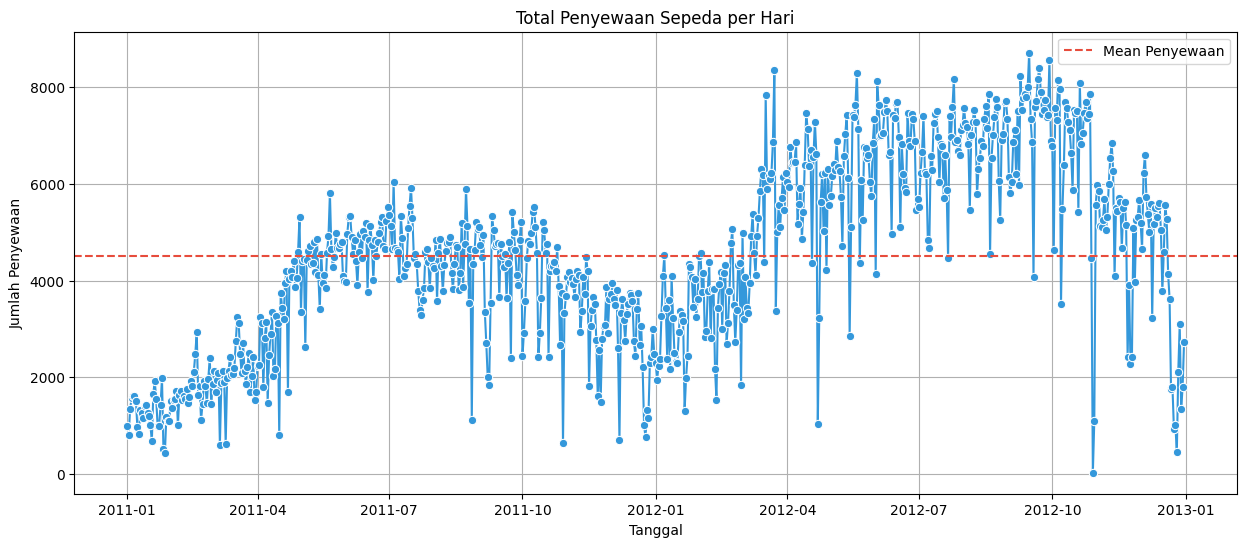

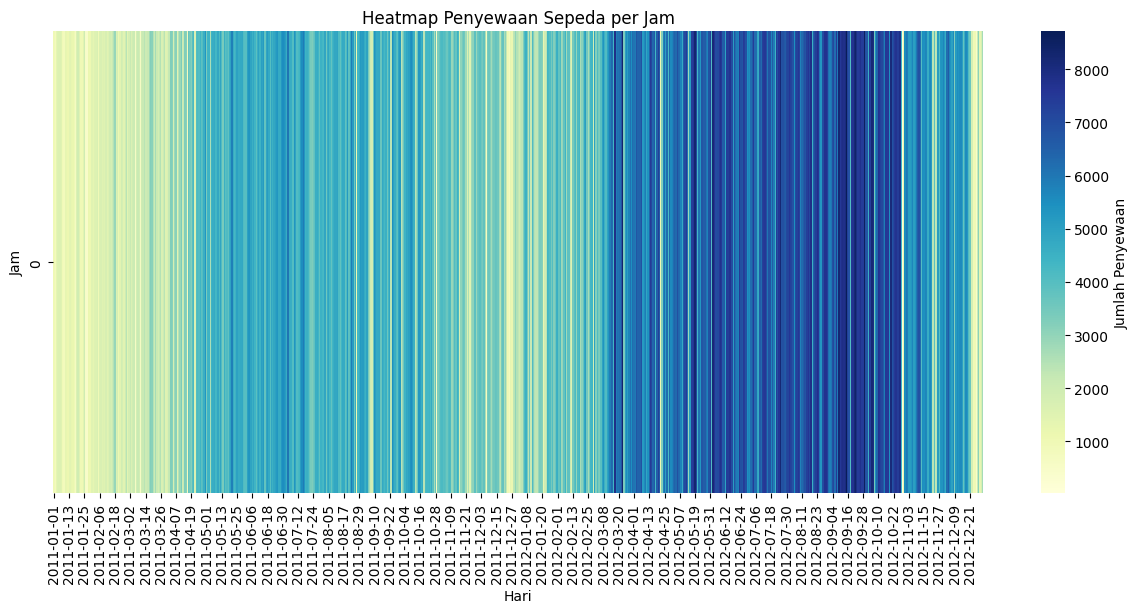

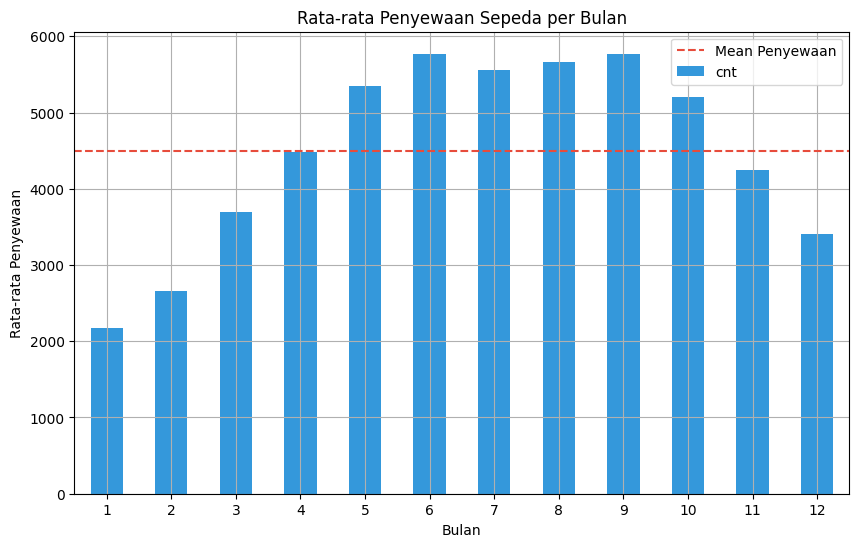

Korelasi dengan Faktor Cuaca:
cnt           1.000000
temp          0.404772
season        0.178056
windspeed     0.093234
weathersit   -0.142426
Name: cnt, dtype: float64


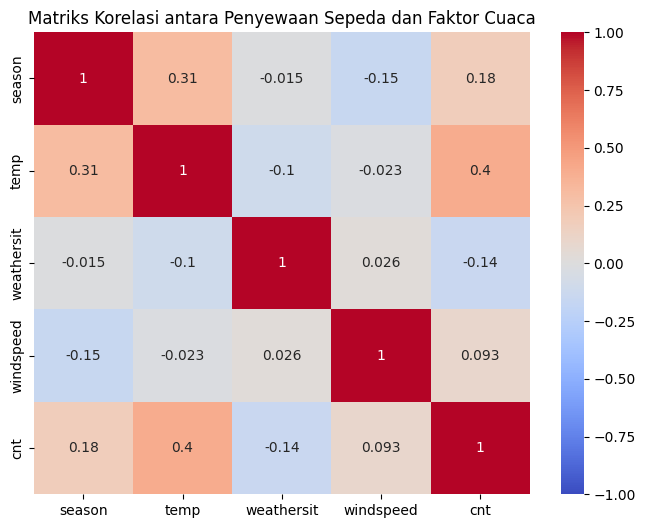

Faktor cuaca yang memiliki pengaruh terbesar terhadap jumlah penyewaan sepeda: temp dengan korelasi 0.40


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
day_data = pd.read_csv('https://raw.githubusercontent.com/Bebennich/bike-sharing-rifqi/refs/heads/main/day.csv')
hour_data = pd.read_csv('https://raw.githubusercontent.com/Bebennich/bike-sharing-rifqi/refs/heads/main/hour.csv')

# Preprocessing day_data
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
day_data['year'] = day_data['dteday'].dt.year
day_data['month'] = day_data['dteday'].dt.month  # Menambahkan bulan ke day_data

# Preprocessing hour_data
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
hour_data['year'] = hour_data['dteday'].dt.year
hour_data['hour'] = hour_data['dteday'].dt.hour

# Visualization 1: Tren Penggunaan Sepeda Tahunan
plt.figure(figsize=(15, 6))
sns.lineplot(x='dteday', y='cnt', data=day_data, marker='o', color='#3498db')
plt.title('Total Penyewaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.axhline(y=day_data['cnt'].mean(), color='#e74c3c', linestyle='--', label='Mean Penyewaan')
plt.legend()
plt.grid()
plt.show()

# Visualization 2: Heatmap Penggunaan Sepeda per Jam
heatmap_data = hour_data.pivot_table(index='hour', columns=hour_data['dteday'].dt.date, values='cnt', aggfunc='sum')
plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Jumlah Penyewaan'})
plt.title('Heatmap Penyewaan Sepeda per Jam')
plt.xlabel('Hari')
plt.ylabel('Jam')
plt.show()

# Visualization 3: Penggunaan Sepeda per Month
plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind='bar', color='#3498db')
plt.title('Rata-rata Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.axhline(y=seasonal_trends.mean(), color='#e74c3c', linestyle='--', label='Mean Penyewaan')
plt.xticks(ticks=range(0, 12), labels=[str(m) for m in range(1, 13)], rotation=0)
plt.legend()
plt.grid()
plt.show()

# Faktor Cuaca
# Menghitung korelasi antara jumlah penyewaan dan faktor cuaca
weather_factors = hour_data[['season','temp','weathersit', 'windspeed', 'cnt']]  # Mengambil kolom cuaca dan cnt
correlation_weather = weather_factors.corr()['cnt'].sort_values(ascending=False)

# Menampilkan hasil korelasi
print("Korelasi dengan Faktor Cuaca:")
print(correlation_weather)

# Visualisasi: Matriks Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(weather_factors.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi antara Penyewaan Sepeda dan Faktor Cuaca')
plt.show()

# Menampilkan faktor cuaca dengan pengaruh terbesar
strongest_factor = correlation_weather.index[1]  # Mengambil faktor dengan pengaruh terbesar setelah 'cnt'
strongest_correlation = correlation_weather.iloc[1]
print(f"Faktor cuaca yang memiliki pengaruh terbesar terhadap jumlah penyewaan sepeda: {strongest_factor} dengan korelasi {strongest_correlation:.2f}")




### Pertanyaan 1:

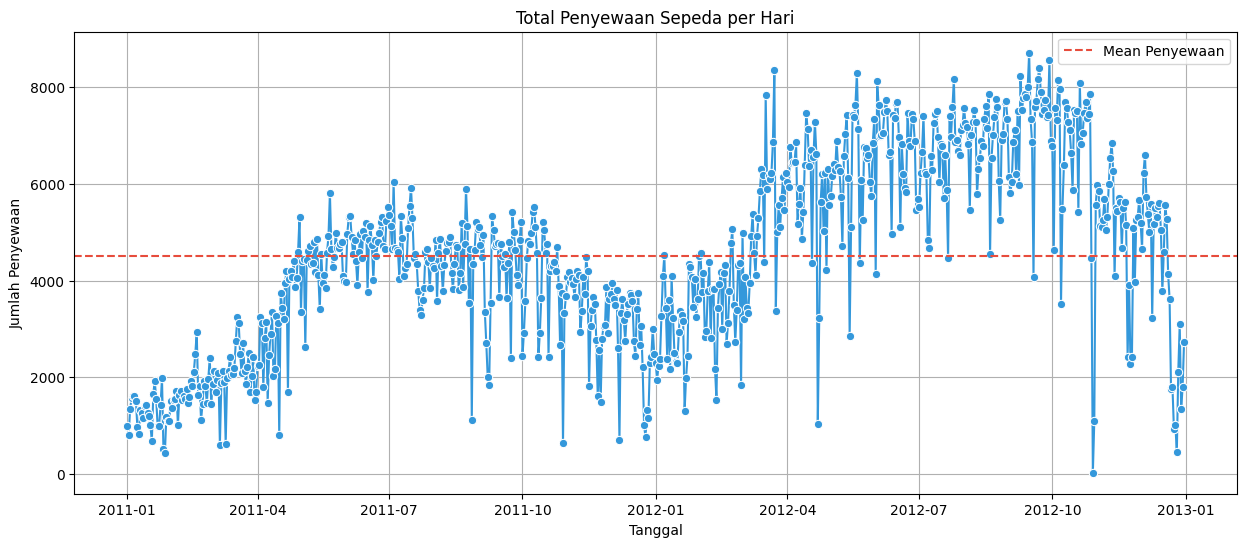

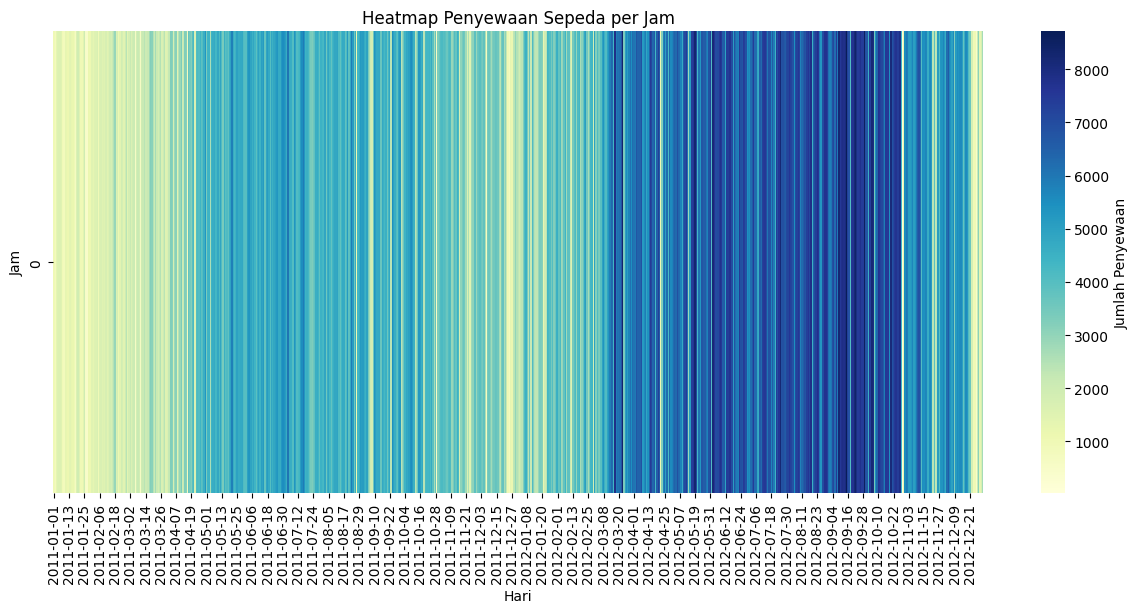

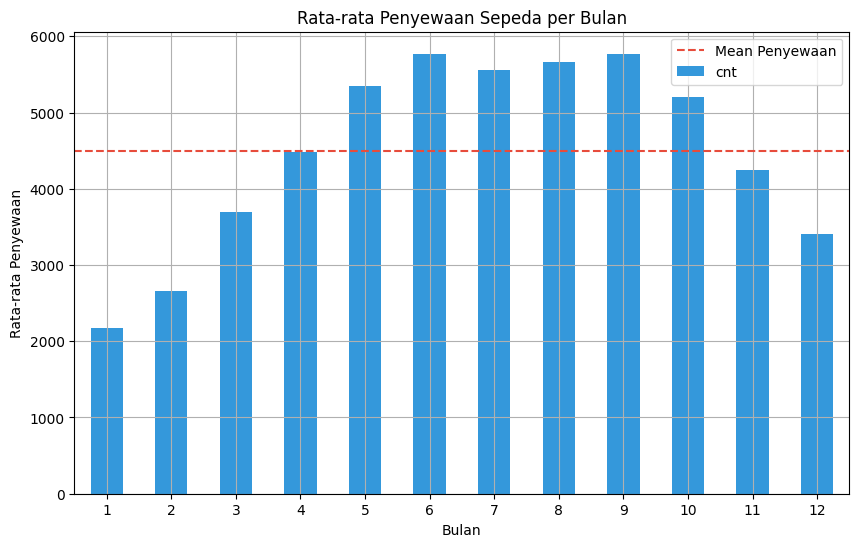

In [83]:
# Preprocessing day_data
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
day_data['year'] = day_data['dteday'].dt.year
day_data['month'] = day_data['dteday'].dt.month  # Menambahkan bulan ke day_data

# Preprocessing hour_data
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
hour_data['year'] = hour_data['dteday'].dt.year
hour_data['hour'] = hour_data['dteday'].dt.hour

# Visualization 1: Tren Penggunaan Sepeda Tahunan
plt.figure(figsize=(15, 6))
sns.lineplot(x='dteday', y='cnt', data=day_data, marker='o', color='#3498db')
plt.title('Total Penyewaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.axhline(y=day_data['cnt'].mean(), color='#e74c3c', linestyle='--', label='Mean Penyewaan')
plt.legend()
plt.grid()
plt.show()

# Visualization 2: Heatmap Penggunaan Sepeda per Jam
heatmap_data = hour_data.pivot_table(index='hour', columns=hour_data['dteday'].dt.date, values='cnt', aggfunc='sum')
plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Jumlah Penyewaan'})
plt.title('Heatmap Penyewaan Sepeda per Jam')
plt.xlabel('Hari')
plt.ylabel('Jam')
plt.show()

# Visualization 3: Penggunaan Sepeda per Month
plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind='bar', color='#3498db')
plt.title('Rata-rata Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.axhline(y=seasonal_trends.mean(), color='#e74c3c', linestyle='--', label='Mean Penyewaan')
plt.xticks(ticks=range(0, 12), labels=[str(m) for m in range(1, 13)], rotation=0)
plt.legend()
plt.grid()
plt.show()

### Pertanyaan 2:

Korelasi dengan Faktor Cuaca:
cnt           1.000000
temp          0.404772
season        0.178056
windspeed     0.093234
weathersit   -0.142426
Name: cnt, dtype: float64


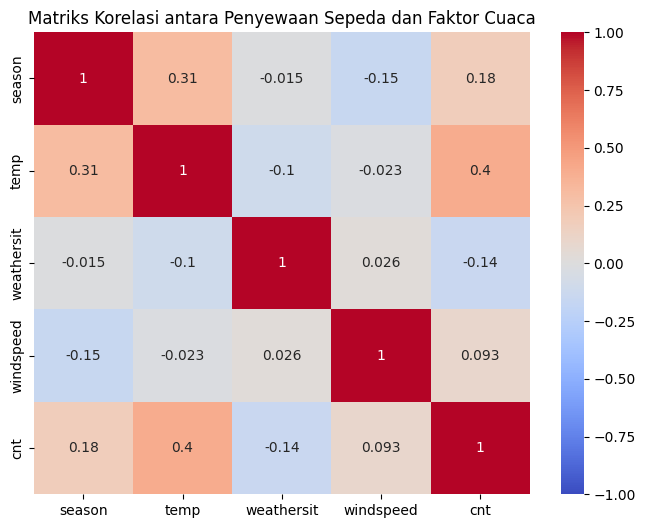

Faktor cuaca yang memiliki pengaruh terbesar terhadap jumlah penyewaan sepeda: temp dengan korelasi 0.40


In [86]:
# Faktor Cuaca
# Menghitung korelasi antara jumlah penyewaan dan faktor cuaca
weather_factors = hour_data[['season','temp','weathersit', 'windspeed', 'cnt']]  # Mengambil kolom cuaca dan cnt
correlation_weather = weather_factors.corr()['cnt'].sort_values(ascending=False)

# Menampilkan hasil korelasi
print("Korelasi dengan Faktor Cuaca:")
print(correlation_weather)

# Visualisasi: Matriks Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(weather_factors.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi antara Penyewaan Sepeda dan Faktor Cuaca')
plt.show()

# Menampilkan faktor cuaca dengan pengaruh terbesar
strongest_factor = correlation_weather.index[1]  # Mengambil faktor dengan pengaruh terbesar setelah 'cnt'
strongest_correlation = correlation_weather.iloc[1]
print(f"Faktor cuaca yang memiliki pengaruh terbesar terhadap jumlah penyewaan sepeda: {strongest_factor} dengan korelasi {strongest_correlation:.2f}")


**Insight:**
- Penyewaan sepeda meningkat selama bulan-bulan hangat (Mei hingga September) dan pada akhir pekan, dengan suhu yang lebih hangat berdampak positif pada jumlah persewaan.

- Heatmap menunjukkan jam-jam puncak penyewaan, terutama pada akhir pekan dan jam sibuk.

## Analisis Lanjutan (Opsional)

Pada Analisis Lanjutan , saya menggunakan metode clustering dengan k-means dengan menggunakan data day yang menjelaskan bahwa memiliki hasil yang berbeda beda setiap bulannya

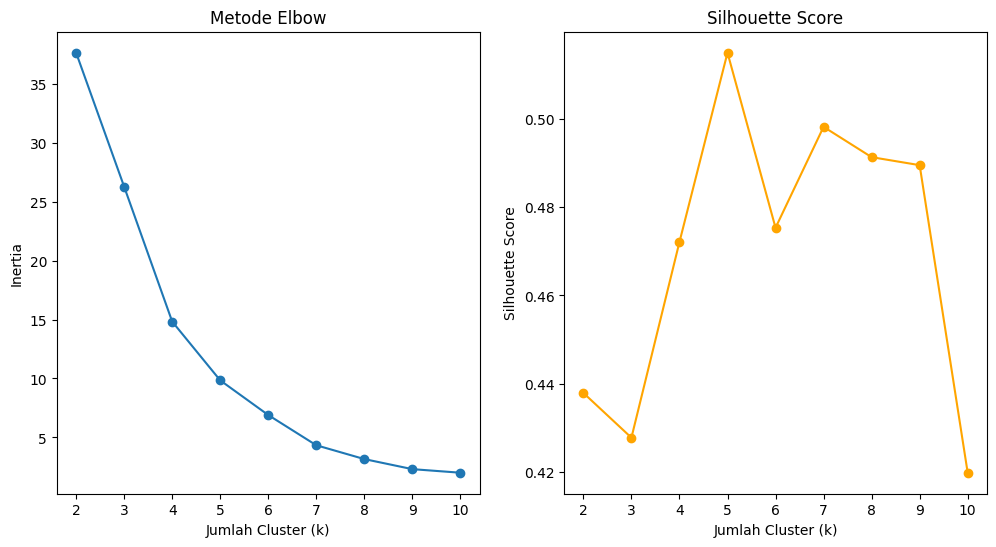

Hasil Klustering:
   year  month     cnt  Cluster
0  2011      1   38189        2
1  2011      2   48215        2
2  2011      3   64045        2
3  2011      4   94870        2
4  2011      5  135821        0


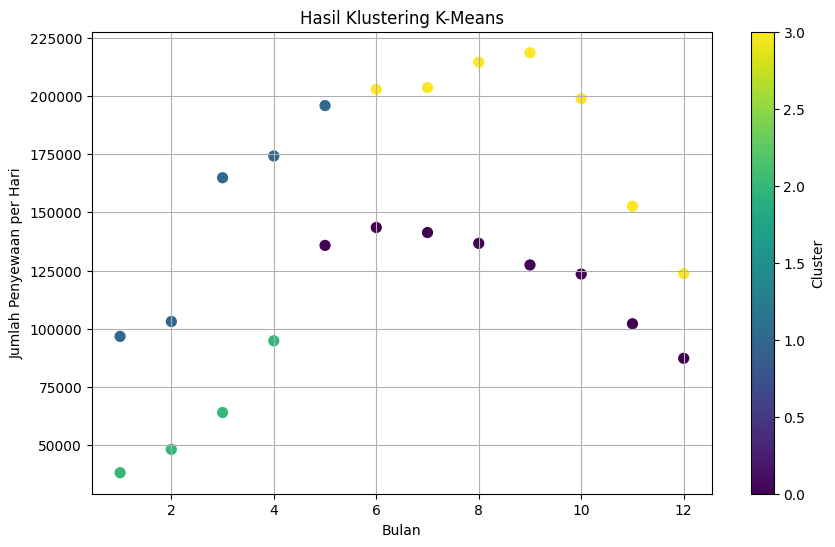

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load datasets
day_data = pd.read_csv('https://raw.githubusercontent.com/Bebennich/bike-sharing-rifqi/refs/heads/main/day.csv')

# Preprocessing: Convert 'dteday' to datetime and extract relevant features
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
day_data['year'] = day_data['dteday'].dt.year
day_data['month'] = day_data['dteday'].dt.month

# Menyiapkan data untuk klustering: Menghitung total penyewaan per hari
usage_per_day = day_data.groupby(['year', 'month'])['cnt'].sum().reset_index()

# Memilih fitur untuk klustering
X = usage_per_day[['year', 'month', 'cnt']]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster dengan metode Elbow
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Menentukan range untuk k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting Elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')

# Plotting Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')

plt.show()

# Menggunakan jumlah cluster yang optimal
optimal_k = 4  # Sesuaikan dengan hasil Elbow/Silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
usage_per_day['Cluster'] = kmeans.fit_predict(X_scaled)

# Menampilkan hasil kluster
print("Hasil Klustering:")
print(usage_per_day.head())

# Visualisasi hasil kluster
plt.figure(figsize=(10, 6))
plt.scatter(usage_per_day['month'], usage_per_day['cnt'], c=usage_per_day['Cluster'], cmap='viridis', s=50)
plt.title('Hasil Klustering K-Means')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan per Hari')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()




## Conclusion

- Tren penggunaan sepeda berdasarkan jam dan hari menunjukkan bahwa jumlah penyewaan meningkat signifikan selama bulan-bulan hangat, terutama dari Mei hingga September, dan cenderung lebih tinggi pada akhir pekan. Visualisasi menunjukkan pola musiman yang kuat, dengan puncak penggunaan sepeda yang terlihat pada bulan-bulan musim panas. Ini menunjukkan bahwa untuk meningkatkan penyewaan, perusahaan rental sepeda sebaiknya fokus pada promosi dan layanan selama periode ini, khususnya pada akhir pekan dan saat cuaca baik.

- Analisis faktor cuaca mengungkapkan bahwa suhu memiliki pengaruh positif yang kuat terhadap jumlah penyewaan sepeda. Korelasi yang signifikan menunjukkan bahwa suhu yang lebih tinggi berkontribusi pada peningkatan jumlah penyewaan. Heatmap analisis menunjukkan jam-jam puncak penyewaan yang terjadi terutama pada akhir pekan dan selama jam sibuk. Oleh karena itu, strategi pemasaran dan pengelolaan layanan harus mempertimbangkan faktor cuaca, dengan perhatian khusus pada suhu, untuk memaksimalkan jumlah penyewaan sepeda.